In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.metrics import accuracy_score

In [2]:
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\win10\Downloads\BMRI.JK.csv")

In [4]:
df=df.dropna(how='any')

In [5]:
df.shape

(1260, 7)

In [6]:
df['Volume']=df['Volume'].astype(int)

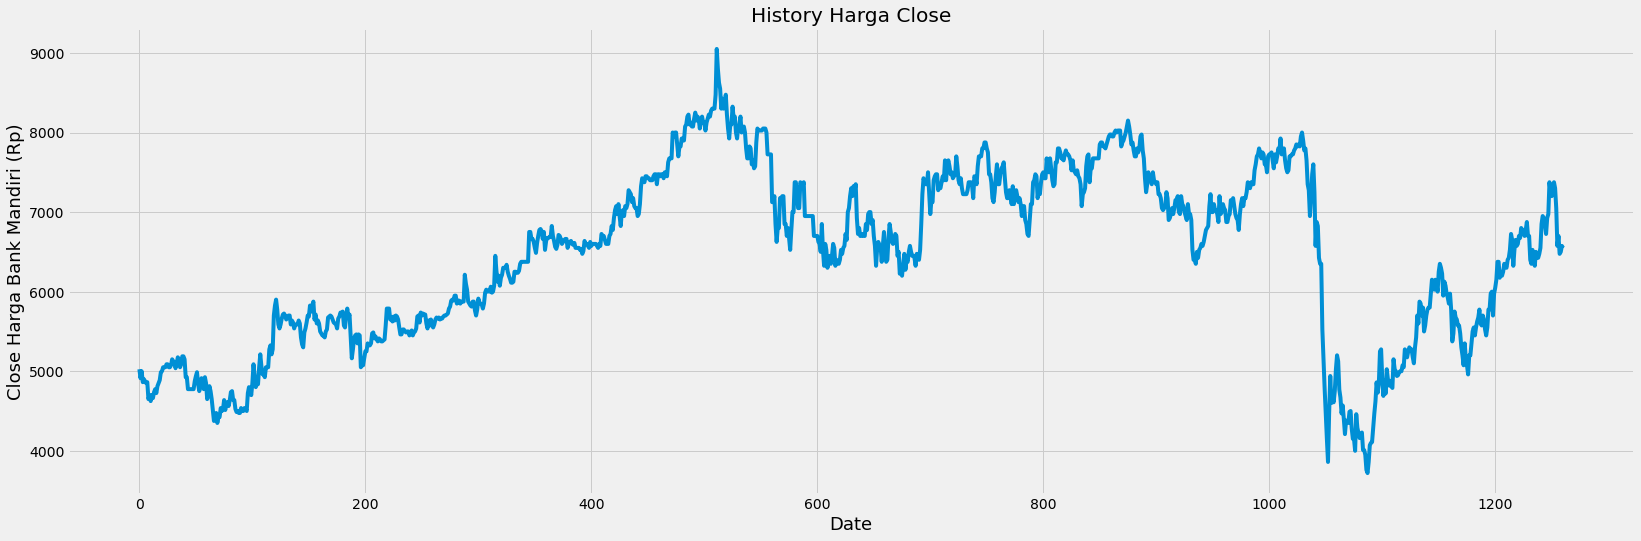

In [7]:
plt.figure(figsize=(25,8))
plt.title('History Harga Close')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Harga Bank Mandiri (Rp)',fontsize=18)
plt.show()

In [8]:
data=df.filter({'Close'})
dataset= data.values
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1008

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [10]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.24484053, 0.22373358, 0.24015009, 0.21435272, 0.22138837,
       0.21669794, 0.2120075 , 0.21435272, 0.17448405, 0.18386492,
       0.16979362, 0.18386492, 0.17682927, 0.19090056, 0.19793621,
       0.18855535, 0.20497186, 0.2120075 , 0.21904315, 0.23780488,
       0.24015009, 0.24953096, 0.24953096, 0.24953096, 0.2565666 ,
       0.2565666 , 0.24953096, 0.24953096, 0.25422139, 0.26829268,
       0.26360225, 0.26125704, 0.24718574, 0.25891182, 0.27298311,
       0.26829268, 0.24953096, 0.2565666 , 0.27532833, 0.27532833,
       0.26829268, 0.2260788 , 0.2260788 , 0.19793621, 0.19793621,
       0.19793621, 0.19793621, 0.19793621, 0.19793621, 0.21669794,
       0.22842402, 0.23780488, 0.20966229, 0.19324578, 0.20497186,
       0.22373358, 0.20731707, 0.19793621, 0.2260788 , 0.2120075 ])]
[0.17448405253283295]



In [11]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [12]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(948, 60, 1)

In [13]:
modelGRU = Sequential() 
modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1))) 
modelGRU.add(Dropout(0.2)) 

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1))) 
modelGRU.add(Dropout(0.2)) 

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1))) 
modelGRU.add(Dropout(0.2)) 

modelGRU.add(GRU(units=50)) 
modelGRU.add(Dropout(0.2)) 

modelGRU.add(Dense(units=1))
modelGRU.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 60, 50)            7950      
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 60, 50)            15300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 60, 50)            15300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 50)                1

In [14]:
modelGRU.compile(optimizer='adam',loss='mean_squared_error')

In [23]:
modelGRU.fit(x_train,y_train,batch_size=1, epochs=10)

Epoch 1/10
948/948 [==============================] - 143s 151ms/step - loss: 0.0051
Epoch 2/10
948/948 [==============================] - 146s 154ms/step - loss: 0.0047
Epoch 3/10
948/948 [==============================] - 143s 151ms/step - loss: 0.0037
Epoch 4/10
948/948 [==============================] - 145s 153ms/step - loss: 0.0038
Epoch 5/10
948/948 [==============================] - 143s 151ms/step - loss: 0.0029
Epoch 6/10
948/948 [==============================] - 143s 151ms/step - loss: 0.0026
Epoch 7/10
948/948 [==============================] - 145s 153ms/step - loss: 0.0029
Epoch 8/10
948/948 [==============================] - 144s 152ms/step - loss: 0.0024
Epoch 9/10
948/948 [==============================] - 146s 154ms/step - loss: 0.0020
Epoch 10/10
948/948 [==============================] - 148s 157ms/step - loss: 0.0020


In [24]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [25]:
x_test=np.array(x_test)

In [26]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [27]:
#GRU
predictions=modelGRU.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [28]:
#GRU RMSE
rmse=np.sqrt(np.mean(predictions - y_test)**2)
rmse

53.62629723927331

<ipython-input-29-6be46560e9cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


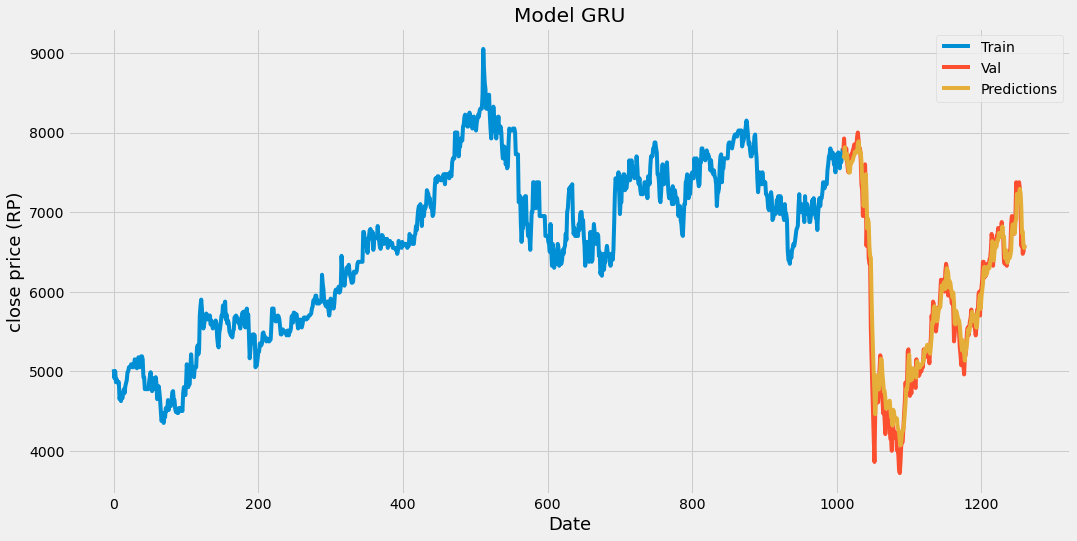

In [29]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model GRU')
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price (RP)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='upper right')
plt.show()

In [30]:
valid

,Close,Predictions
1009,7775.0,7707.687988
1010,7925.0,7688.333496
1011,7725.0,7813.412598
1012,7750.0,7666.791016
1013,7800.0,7693.306152
...,...,...
1256,6700.0,6739.681152
1257,6475.0,6758.480469
1258,6500.0,6584.567871
1259,6575.0,6547.405762
